# Introduction to `pvlib`


<img src="https://pvlib-python.readthedocs.io/en/stable/_images/pvlib_logo_horiz.png" width="300px" />

**pvlib** is a set of documented functions for simulating the performance of photovoltaic energy systems.

- GitHub: <https://github.com/pvlib/pvlib-python>

Documentation for this package is available at https://pvlib-python.readthedocs.io/en/stable/. You can also check out the pvlib python [examples gallery](https://pvlib-python.readthedocs.io/en/stable/auto_examples/index.html)

You can ask for help and find useful discussion on the [pvlib-python Google Group](https://groups.google.com/g/pvlib-python)



:::{note}
This material is mostly adapted from the following resources:
- [PVSC48-Python-Tutorial](https://github.com/PV-Tutorials/PVSC48-Python-Tutorial)

:::

The sketch below from [the Sandia PV Performance Modeling Collaborative (PVPMC)](https://pvpmc.sandia.gov/) outlines the topics covered in this introduction:

![Overview](images/overview.PNG)


# 1 - Access weather data (e.g. typical meteorological year -TMY-), understand solar irradiance data, and visualize it.

Typical Meteorological Year (TMY) datasets are intended to represent the weather for a typical year at a given location. 

TMY datasets provide hourly **solar irradiance**, **air temperature**, **wind speed**, and other weather measurements for a hypothetical year that represents more or less a "median year" for solar resource.  

We start importing the packages that we will use. 

In [65]:
import os  # for getting environment variables
import pathlib  # for finding the example dataset
import pvlib
import pandas as pd  
import matplotlib.pyplot as plt 

**Reading a TMY dataset with pvlib**

First, we'll read the TMY dataset with [`pvlib.iotools.read_tmy3()`](https://pvlib-python.readthedocs.io/en/stable/generated/pvlib.iotools.read_tmy3.html) which returns a [Pandas DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html) of the timeseries weather data and a second output with a Python dictionary of the TMY metadata like longitude, latitude, elevation, etc.

We will use the Python [`pathlib`](https://docs.python.org/3/library/pathlib.html) to get the path to the `'data'` directory which comes with the `pvlib` package. Then we can use the slash operator, `/` to make the full path to the TMY file.


In [66]:
help(pvlib.iotools.read_tmy3)

Help on function read_tmy3 in module pvlib.iotools.tmy:

read_tmy3(filename, coerce_year=None, map_variables=None, recolumn=None, encoding=None)
    Read a TMY3 file into a pandas dataframe.
    
    Note that values contained in the metadata dictionary are unchanged
    from the TMY3 file (i.e. units are retained). In the case of any
    discrepancies between this documentation and the TMY3 User's Manual
    [1]_, the TMY3 User's Manual takes precedence.
    
    The TMY3 files were updated in Jan. 2015. This function requires the
    use of the updated files.
    
    Parameters
    ----------
    filename : str
        A relative file path or absolute file path.
    coerce_year : int, optional
        If supplied, the year of the index will be set to ``coerce_year``, except
        for the last index value which will be set to the *next* year so that
        the index increases monotonically.
    map_variables : bool, optional
        When True, renames columns of the DataFrame to p

In [67]:
DATA_DIR = pathlib.Path(pvlib.__file__).parent / 'data'
df_tmy, metadata = pvlib.iotools.read_tmy3(DATA_DIR / '723170TYA.CSV', 
                                            coerce_year=1990,
                                           map_variables=True)
metadata  # display the dictionary of metadata

{'USAF': 723170,
 'Name': '"GREENSBORO PIEDMONT TRIAD INT"',
 'State': 'NC',
 'TZ': -5.0,
 'latitude': 36.1,
 'longitude': -79.95,
 'altitude': 273.0}

Let's display the first 4 lines of the dataframe

In [68]:
df_tmy.head(4)

,Date (MM/DD/YYYY),Time (HH:MM),ghi_extra,dni_extra,ghi,GHI source,GHI uncert (%),dni,DNI source,DNI uncert (%),...,albedo,Alb source,Alb uncert (code),Lprecip depth (mm),Lprecip quantity (hr),Lprecip source,Lprecip uncert (code),PresWth (METAR code),PresWth source,PresWth uncert (code)
1990-01-01 01:00:00-05:00,01/01/1988,01:00,0,0,0,1,0,0,1,0,...,0.0,?,0,0,1,D,9,0,C,8
1990-01-01 02:00:00-05:00,01/01/1988,02:00,0,0,0,1,0,0,1,0,...,0.0,?,0,0,1,D,9,0,C,8
1990-01-01 03:00:00-05:00,01/01/1988,03:00,0,0,0,1,0,0,1,0,...,0.0,?,0,0,1,D,9,0,C,8
1990-01-01 04:00:00-05:00,01/01/1988,04:00,0,0,0,1,0,0,1,0,...,0.0,?,0,0,1,D,9,0,C,8


This dataset follows the standard format of handling timeseries data with pandas -- one row per timestamp, one column per measurement type.  Because TMY files represent one year of data (no leap years), that means they'll have 8760 rows.  The number of columns can vary depending on the source of the data.

In [69]:
print("Number of rows:", len(df_tmy))
print("Number of columns:", len(df_tmy.columns))

Number of rows: 8760
Number of columns: 71


You can access single rows by pointing to its number location (iloc) or by using the index name it has. In this case, the index is a dateTime

In [70]:
df_tmy.iloc[0]

Date (MM/DD/YYYY)        01/01/1988
Time (HH:MM)                  01:00
ghi_extra                         0
dni_extra                         0
ghi                               0
                            ...    
Lprecip source                    D
Lprecip uncert (code)             9
PresWth (METAR code)              0
PresWth source                    C
PresWth uncert (code)             8
Name: 1990-01-01 01:00:00-05:00, Length: 71, dtype: object

In [71]:
df_tmy.loc['1990-01-01 01:00:00-05:00']

Date (MM/DD/YYYY)        01/01/1988
Time (HH:MM)                  01:00
ghi_extra                         0
dni_extra                         0
ghi                               0
                            ...    
Lprecip source                    D
Lprecip uncert (code)             9
PresWth (METAR code)              0
PresWth source                    C
PresWth uncert (code)             8
Name: 1990-01-01 01:00:00-05:00, Length: 71, dtype: object

You can also print all the column names in the dataframe

In [72]:
df_tmy.keys()

Index(['Date (MM/DD/YYYY)', 'Time (HH:MM)', 'ghi_extra', 'dni_extra', 'ghi',
       'GHI source', 'GHI uncert (%)', 'dni', 'DNI source', 'DNI uncert (%)',
       'dhi', 'DHI source', 'DHI uncert (%)', 'GH illum (lx)',
       'GH illum source', 'Global illum uncert (%)', 'DN illum (lx)',
       'DN illum source', 'DN illum uncert (%)', 'DH illum (lx)',
       'DH illum source', 'DH illum uncert (%)', 'Zenith lum (cd/m^2)',
       'Zenith lum source', 'Zenith lum uncert (%)', 'TotCld (tenths)',
       'TotCld source', 'TotCld uncert (code)', 'OpqCld (tenths)',
       'OpqCld source', 'OpqCld uncert (code)', 'temp_air', 'Dry-bulb source',
       'Dry-bulb uncert (code)', 'temp_dew', 'Dew-point source',
       'Dew-point uncert (code)', 'relative_humidity', 'RHum source',
       'RHum uncert (code)', 'pressure', 'Pressure source',
       'Pressure uncert (code)', 'wind_direction', 'Wdir source',
       'Wdir uncert (code)', 'wind_speed', 'Wspd source', 'Wspd uncert (code)',
       'Hvis (m

There are 71 columns, which is quite a lot!  For now, let's focus just on the ones that are most important for PV modeling -- the irradiance, temperature, and wind speed columns, and extract them into a new DataFrame.

For this NREL TMY3 dataset the units of irradiance are W/m&sup2;, air temperature is in &deg;C, and wind speed is m/s.


In [73]:
# GHI, DHI, DNI are irradiance measurements
# DryBulb is the "dry-bulb" (ambient) temperature
# Wspd is wind speed
df = df_tmy[['ghi', 'dhi', 'dni', 'temp_air', 'wind_speed']]
# show the first 15 rows:
df.head(15)

,ghi,dhi,dni,temp_air,wind_speed
1990-01-01 01:00:00-05:00,0,0,0,10.0,6.2
1990-01-01 02:00:00-05:00,0,0,0,10.0,5.2
1990-01-01 03:00:00-05:00,0,0,0,10.0,5.7
1990-01-01 04:00:00-05:00,0,0,0,10.0,5.7
1990-01-01 05:00:00-05:00,0,0,0,10.0,5.2
1990-01-01 06:00:00-05:00,0,0,0,10.0,4.1
1990-01-01 07:00:00-05:00,0,0,0,10.0,4.1
1990-01-01 08:00:00-05:00,9,9,1,10.0,5.2
1990-01-01 09:00:00-05:00,46,46,3,10.0,5.2
1990-01-01 10:00:00-05:00,79,78,4,10.6,5.2


**Plotting time series data with pandas and matplotlib**

Let's make some plots to get a better idea of what TMY data gives us.

First, the three irradiance fields:

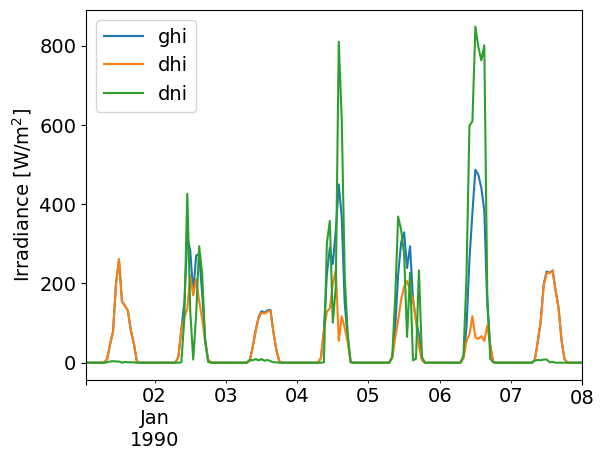

In [74]:
first_week = df.head(24*7)  # Plotting 7 days, each one has 24 hours or entries
first_week[['ghi', 'dhi', 'dni']].plot()
plt.ylabel('Irradiance [W/m$^2$]');

Let's control the parameters a bit more

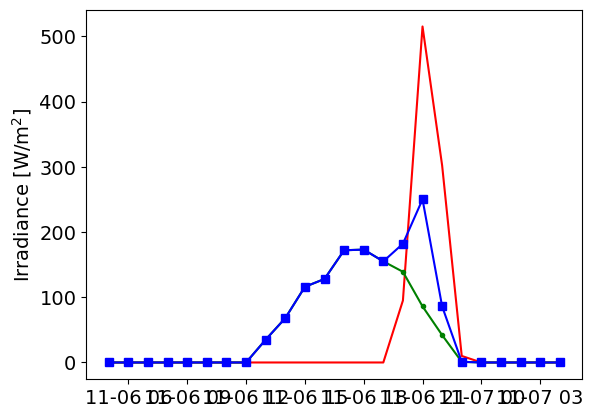

In [75]:
birthday = df.loc['1990-11-06':'1990-11-06']
plt.plot(birthday['dni'], color='r') 
plt.plot(birthday['dhi'], color='g', marker='.') 
plt.plot(birthday['ghi'], color='b', marker='s') 
plt.ylabel('Irradiance [W/m$^2$]');

We can also plot a summer week.

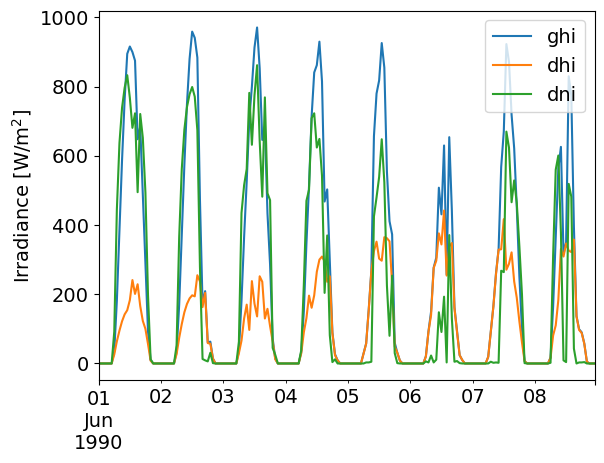

In [76]:
summer_week = df.loc['1990-06-01':'1990-06-08']
summer_week[['ghi', 'dhi', 'dni']].plot()
plt.ylabel('Irradiance [W/m$^2$]');

We can also plot the air temperature and wind speed.

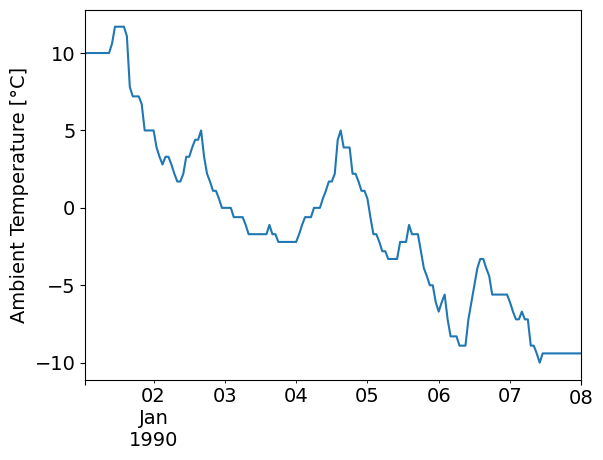

In [77]:
first_week['temp_air'].plot()
plt.ylabel('Ambient Temperature [°C]');

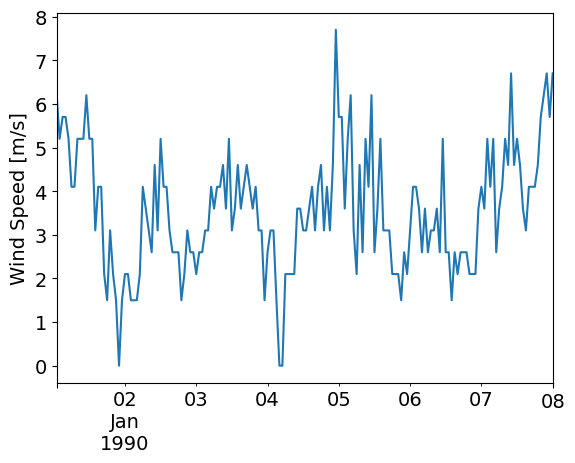

In [78]:
first_week['wind_speed'].plot()
plt.ylabel('Wind Speed [m/s]');

Pandas makes it easy to roll-up timeseries data into summary values. We can use the [`DataFrame.resample()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html) function with [`DateOffsets`](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#dateoffset-objects) like `'M'` for months.  For example, we can calculate total monthly GHI as a quick way to visualize the seasonality of solar resource:


In [79]:
# summing hourly irradiance (W/m^2) gives insolation (W h/m^2)
monthly_ghi = df['ghi'].resample('M').sum()
monthly_ghi.head(4)

1990-01-31 00:00:00-05:00     74848
1990-02-28 00:00:00-05:00     85751
1990-03-31 00:00:00-05:00    131766
1990-04-30 00:00:00-05:00    162302
Freq: M, Name: ghi, dtype: int64

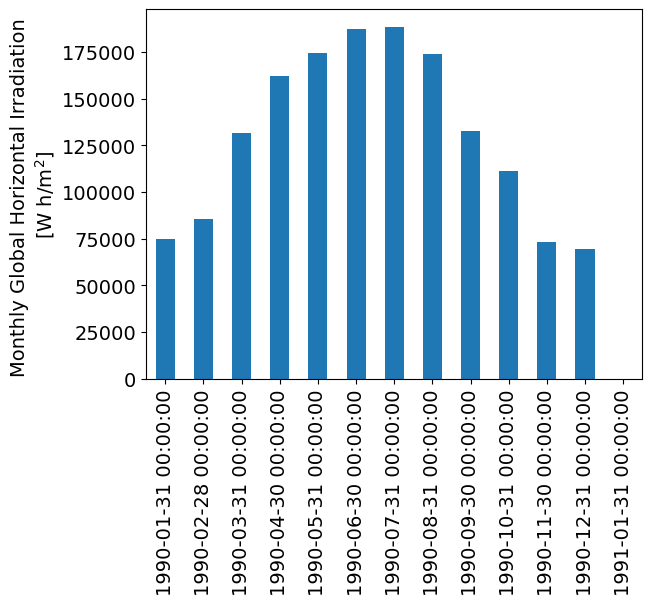

In [80]:
monthly_ghi = monthly_ghi.tz_localize(None)  # don't need timezone for monthly data
monthly_ghi.plot.bar()
plt.ylabel('Monthly Global Horizontal Irradiation \n[W h/m$^2$]');

We can also take monthly averages instead of monthly sums:

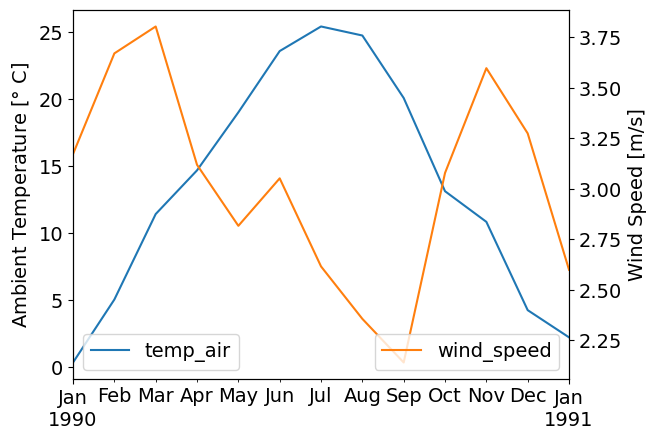

In [81]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()  # add a second y-axis
monthly_average_temp_wind = df[['temp_air', 'wind_speed']].resample('M').mean()
monthly_average_temp_wind['temp_air'].plot(ax=ax1, c='tab:blue')
monthly_average_temp_wind['wind_speed'].plot(ax=ax2, c='tab:orange')
ax1.set_ylabel(r'Ambient Temperature [$\degree$ C]')
ax2.set_ylabel(r'Wind Speed [m/s]')
ax1.legend(loc='lower left')
ax2.legend(loc='lower right');

# 2. Calculate plane of array (POA) irradiance

The amount of sunlight collected by a PV panel depends on how well the panel orientation matches incoming sunlight.
The three components of solar irradiance must be tansposed on the plane of array (POA) and added to calculate the total POA irradiance.


**How is array orientation defined?**

Two parameters define the panel orientation, one that measures the cardinal direction (North, East, South, West), and one that measures how high in the sky the panel faces:

- tilt; measured in degrees from horizontal.  A flat panel is at tilt=0 and a panel standing on its edge has tilt=90.
- azimuth; measured in degrees from North.  The direction along the horizon the panel is facing.  N=0, E=90, S=180, W=270.

A fixed array has fixed tilt and azimuth, but a tracker array constantly changes its orientation to best match the sun's position.  So depending on the system configuration, tilt and azimuth may or may not be time series values.

In [82]:
# First, let's make a Location object corresponding to the TMY that we have previously imported
location = pvlib.location.Location(latitude=metadata['latitude'],
                                   longitude=metadata['longitude'])

Because part of the transposition process requires knowing where the sun is in the sky, let's use pvlib to calculate solar position.  TMY data represents the average weather conditions across each hour, meaning we need to calculate solar position in the middle of each hour.  pvlib calculates solar position for the exact timestamps you specify, so we need to adjust the times by half an interval (30 minutes):

In [83]:
# Note: TMY datasets are right-labeled hourly intervals, e.g. the
# 10AM to 11AM interval is labeled 11.  We should calculate solar position in
# the middle of the interval (10:30), so we subtract 30 minutes:
times = df_tmy.index - pd.Timedelta('30min')
solar_position = location.get_solarposition(times)
# but remember to shift the index back to line up with the TMY data:
solar_position.index += pd.Timedelta('30min')

solar_position.head()

,apparent_zenith,zenith,apparent_elevation,elevation,azimuth,equation_of_time
1990-01-01 01:00:00-05:00,166.841893,166.841893,-76.841893,-76.841893,6.889661,-3.395097
1990-01-01 02:00:00-05:00,160.512529,160.512529,-70.512529,-70.512529,52.424214,-3.414863
1990-01-01 03:00:00-05:00,149.674856,149.674856,-59.674856,-59.674856,73.251821,-3.434619
1990-01-01 04:00:00-05:00,137.777090,137.777090,-47.777090,-47.777090,85.208599,-3.454365
1990-01-01 05:00:00-05:00,125.672180,125.672180,-35.672180,-35.672180,94.134730,-3.474102


The two values needed here are the solar zenith (how close the sun is to overhead) and azimuth (what direction along the horizon the sun is, like panel azimuth).  The difference between `apparent_zenith` and `zenith` is that `apparent_zenith` includes the effect of atmospheric refraction.

Now that we have a time series of solar position that matches our irradiance data, let's run a transposition model using the convenient wrapper function [`pvlib.irradiance.get_total_irradiance`](https://pvlib-python.readthedocs.io/en/latest/generated/pvlib.irradiance.get_total_irradiance.html). The more complex transposition models like Perez and Hay Davies require additional weather inputs, so for simplicity we'll just use the basic `isotropic` model here, which is the default if nothing is passed for `model` keyword argument.  As an example, we'll model a fixed array tilted south at 20 degrees.

In [84]:
df_poa = pvlib.irradiance.get_total_irradiance(
        surface_tilt=20,  # tilted 20 degrees from horizontal
        surface_azimuth=180,  # facing South
        dni=df_tmy['dni'],
        ghi=df_tmy['ghi'],
        dhi=df_tmy['dhi'],
        solar_zenith=solar_position['apparent_zenith'],
        solar_azimuth=solar_position['azimuth'],
        model='isotropic')

`get_total_irradiance` returns a DataFrame containing each of the POA components mentioned earlier (direct, diffuse, and ground), along with the total in-plane irradiance.  

In [85]:
df_poa.keys()

Index(['poa_global', 'poa_direct', 'poa_diffuse', 'poa_sky_diffuse',
       'poa_ground_diffuse'],
      dtype='object')

Let's visualize monthly global radiation to summarize the difference between the irradiation received by a flat panel (GHI) and that of a tilted panel (POA):

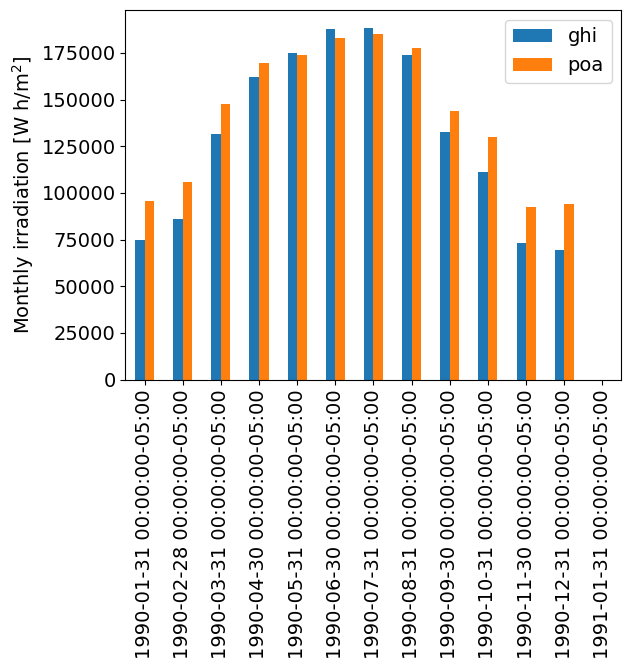

In [86]:
df = pd.DataFrame({
    'ghi': df_tmy['ghi'],
    'poa': df_poa['poa_global'],
})
df_monthly = df.resample('M').sum()
df_monthly.plot.bar()
plt.ylabel('Monthly irradiation [W h/m$^2$]');

This plot shows that, compared with a flat array, a tilted array receives significantly more irradiation in the winter.  However, it comes at the cost of slightly less irradiation in the summer.  

Let's look at a sunny day in winter vs a sunny day in summer. 

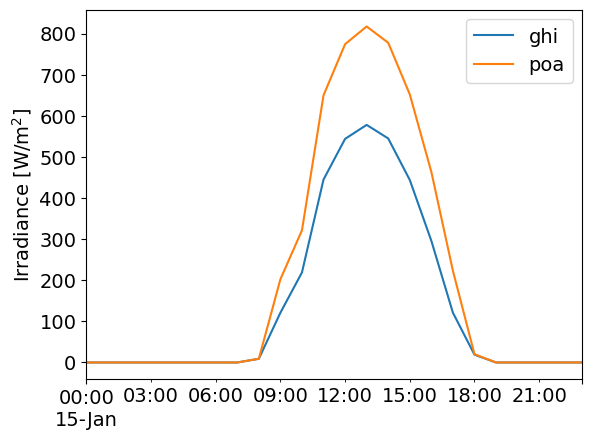

In [87]:
df.loc['1990-01-15'].plot()
plt.ylabel('Irradiance [W/m$^2$]');

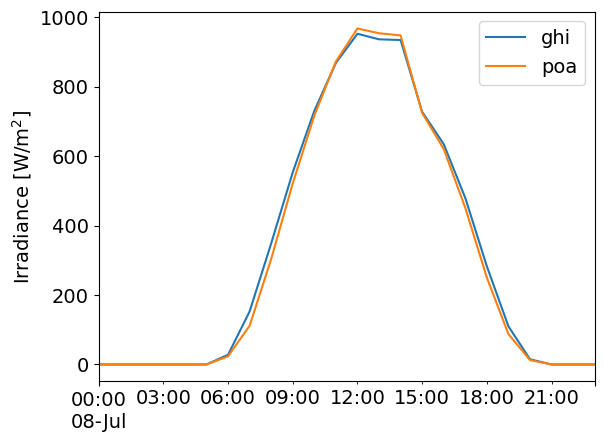

In [88]:
df.loc['1990-07-08'].plot()
plt.ylabel('Irradiance [W/m$^2$]');

**Modeling POA for a tracking system**

The previous section calculated the transposition assuming a fixed array tilt and azimuth.  Now we'll do the same for a tracking array that follows the sun across the sky.  The most common type of tracking array is what's called a horizonalsingle-axis tracker (HSAT) that rotates from East to West to follow the sun.  We can calculate the time-dependent orientation of a HSAT array with pvlib:

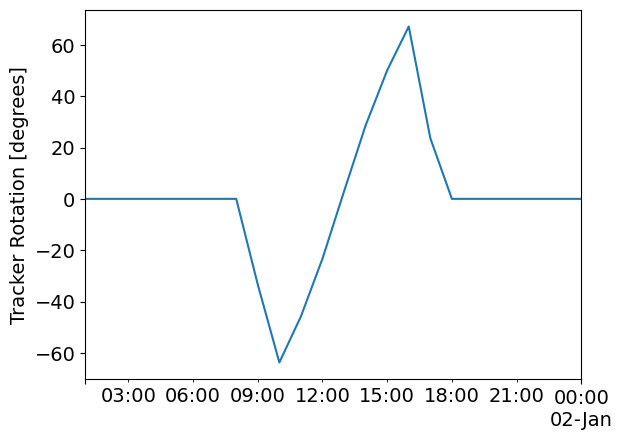

In [89]:
tracker_data = pvlib.tracking.singleaxis(
                solar_position['apparent_zenith'],
                solar_position['azimuth'],
            axis_azimuth=180,  # axis is aligned N-S
            )  # leave the rest of the singleaxis parameters like backtrack and gcr at their defaults
tilt = tracker_data['surface_tilt'].fillna(0)
azimuth = tracker_data['surface_azimuth'].fillna(0)

# plot a day to illustrate:
tracker_data['tracker_theta'].fillna(0).head(24).plot()
plt.ylabel('Tracker Rotation [degrees]');

This plot shows a single day of tracker operation.  The y-axis shows the tracker rotation from horizontal, so 0 degrees means the panels are flat.  In the morning, the trackers rotate to negative angles to face East towards the morning sun; in the afternoon they rotate to positive angles to face West towards the evening sun.  In the middle of the day, the trackers are flat because the sun is more or less overhead.

Now we can model the irradiance collected by a tracking array -- we follow the same procedure as before, but using the timeseries tilt and azimuth this time:

In [90]:
df_poa_tracker = pvlib.irradiance.get_total_irradiance(
    surface_tilt=tilt,  # time series for tracking array
    surface_azimuth=azimuth,  # time series for tracking array
    dni=df_tmy['dni'],
    ghi=df_tmy['ghi'],
    dhi=df_tmy['dhi'],
    solar_zenith=solar_position['apparent_zenith'],
    solar_azimuth=solar_position['azimuth'])
tracker_poa = df_poa_tracker['poa_global']

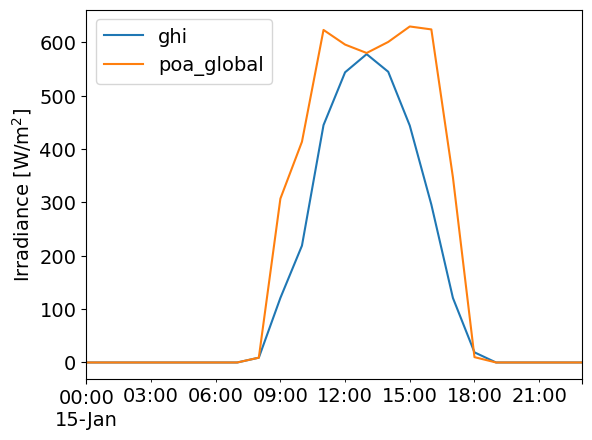

In [91]:
df.loc['1990-01-15', 'ghi'].plot()
tracker_poa.loc['1990-01-15'].plot()
plt.legend()
plt.ylabel('Irradiance [W/m$^2$]');

The tracking system can tilt the array steeply East and West to face towards the sun in early morning and late afternoon, meaning the edges of day get much higher irradiance than for a south-facing array.

Note that the POA calculations discussed above do not address the partial blocking of diffuse light in arrays with multiple tilted rows of PV modules, so the results will be slightly (typically 1-3%) optimistic relative to real conditions or to commercial modeling software. 

# 3. Calculate module temperature from ambient data. 

Here we will use the thermal model from the Sandia Array Performance Model (SAPM) to estimate cell temperature from ambient conditions.  The SAPM thermal model takes only POA irradiance, ambient temperature, and wind speed as weather inputs, but it also requires a set of parameters that characterize the thermal properties of the module of interest as the module's mounting configuration.  Parameter values covering the common system designs are provided with pvlib:

In [92]:
all_parameters = pvlib.temperature.TEMPERATURE_MODEL_PARAMETERS['sapm']
list(all_parameters.keys())

['open_rack_glass_glass',
 'close_mount_glass_glass',
 'open_rack_glass_polymer',
 'insulated_back_glass_polymer']

`open_rack_glass_polymer` is appropriate for many large-scale systems (polymer backsheet; open racking), so we will use it here:

In [93]:
parameters = all_parameters['open_rack_glass_polymer']
# note the "splat" operator "**" which expands the dictionary "parameters"
# into a comma separated list of keyword arguments
cell_temperature = pvlib.temperature.sapm_cell(
    tracker_poa, df_tmy['temp_air'], df_tmy['wind_speed'], **parameters)

Let's compare ambient temperature with cell temperature.  Notice how our modeled cell temperature rises significantly above ambient temperature during the day, especially on sunny days:

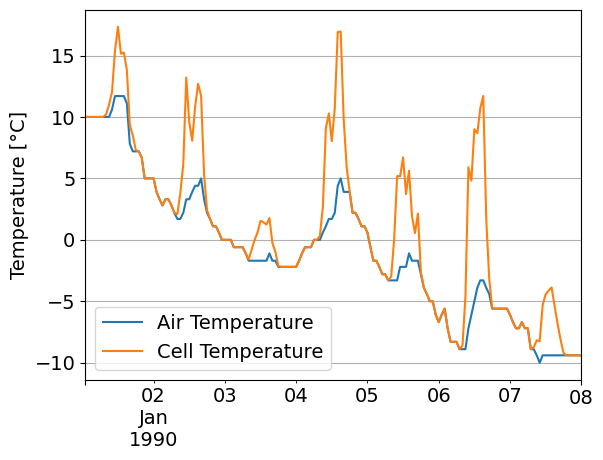

In [94]:
df_tmy['temp_air'].head(24*7).plot()
cell_temperature.head(24*7).plot()
plt.grid()
plt.legend(['Air Temperature', 'Cell Temperature'])
plt.ylabel('Temperature [°C]');

Wind speed also has an effect, but it's harder to see in a time series plot like this. To make it clearer, let's make a scatter plot:

Text(0.5, 1.0, 'Cell temperature rise, colored by wind speed')

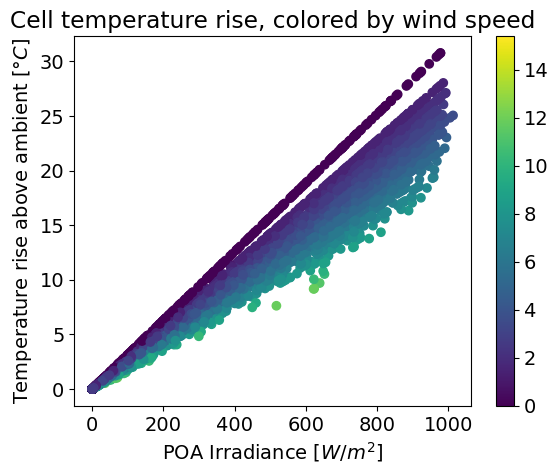

In [95]:
temperature_difference = cell_temperature - df_tmy['temp_air']
plt.scatter(tracker_poa, temperature_difference, c=df_tmy['wind_speed'])
plt.colorbar()
plt.ylabel('Temperature rise above ambient [$\degree C$]')
plt.xlabel('POA Irradiance [$W/m^2$]');
plt.title('Cell temperature rise, colored by wind speed')

The main trend is a bigger temperature difference as incident irradiance increases.  However, this plot shows that higher wind speed reduces the effect -- faster wind means more convective cooling, so a lower cell temperature than it would be in calm air.

Note: the gap at the upper edge of the trend is an artifact of the low resolution of wind speed values in this TMY dataset; there are no values between 0 and 0.3 m/s.

# 4. Use POA irradiance and module temperature to model a PV module's performance. 

Now that we know how to obtain the plane of array (POA) irradiance and cell temperature, let's calculate the
array's output power.

Here we will use one of the more basic PV models implemented by pvlib.  The PVWatts module model requires only two array parameters -- the array size (nameplate capacity) and the array's efficiency dependence on cell temperature.  

For demonstration purposes, we'll assume a 1 kW array with horizontal single axis tracking (HSAT) and a temperature coefficient of -0.4%/°C:

In [96]:
gamma_pdc = -0.004  # -0.4 %/°C 
nameplate = 1e3

array_power = pvlib.pvsystem.pvwatts_dc(tracker_poa, cell_temperature, nameplate, gamma_pdc)

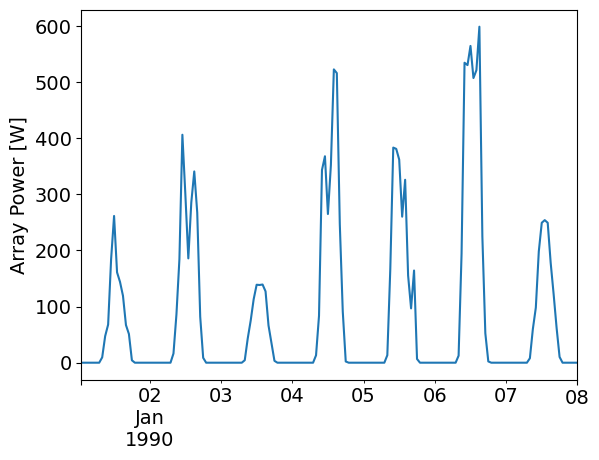

In [97]:
array_power.head(24*7).plot()
plt.ylabel('Array Power [W]');

Let's take a look at the array's response to irradiance and temperature:

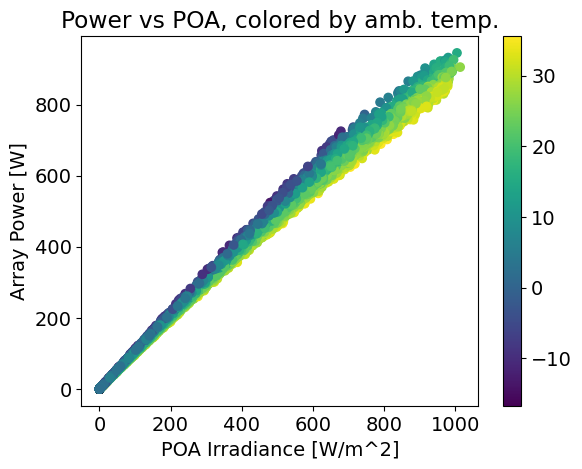

In [98]:
plt.scatter(tracker_poa, array_power, c=df_tmy['temp_air'])
plt.colorbar()
plt.ylabel('Array Power [W]')
plt.xlabel('POA Irradiance [W/m^2]')
plt.title('Power vs POA, colored by amb. temp.');

This plot shows a strong, near-linear trend of power with POA irradiance.  However, it also shows a performance change with temperature -- as ambient temperature increases, array output drops.  The gradient is smoother if we color by cell temperature:

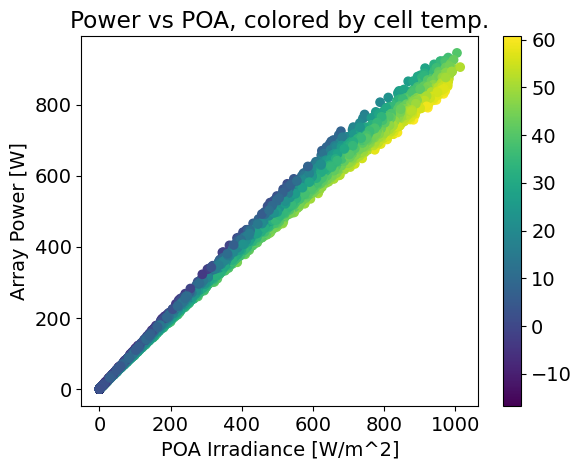

In [99]:
plt.scatter(tracker_poa, array_power, c=cell_temperature)
plt.colorbar()
plt.ylabel('Array Power [W]')
plt.xlabel('POA Irradiance [W/m^2]')
plt.title('Power vs POA, colored by cell temp.');

Another way of viewing the temperature effect is to compare monthly energy production with monthly POA irradiation, noticing how production dips relative to irradiation in the summertime.  Note that irradiation and production happen to be about the same scale here; that's just a coincidence because of the array size we chose.

Text(0, 0.5, 'Energy [Wh]')

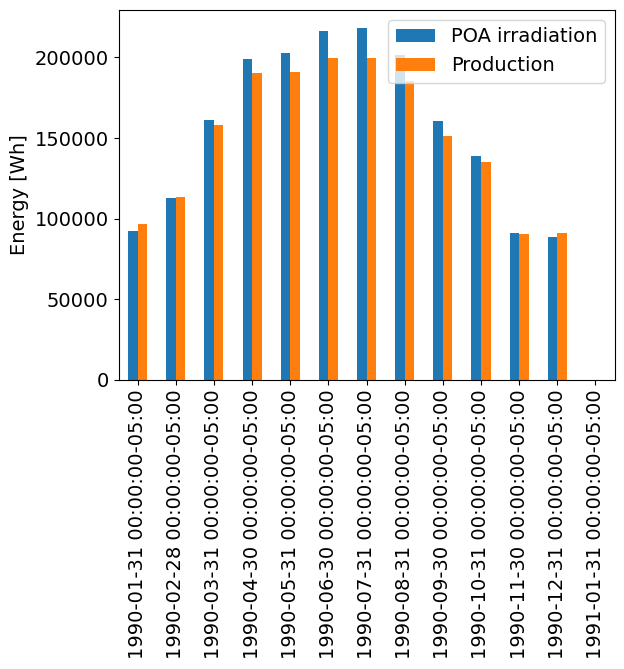

In [100]:
df_plot = pd.DataFrame({
    'POA irradiation': tracker_poa,
    'Production': array_power,
})
# summing hourly power (W) gives (W h)
df_plot.resample('M').sum().plot.bar()
plt.ylabel('Energy [Wh]')

**Calculating AC Power**
PVWatts has a simplified inverter model. Use [`pvlib.inverter.pvwatts(pdc, pdc0)`](https://pvlib-python.readthedocs.io/en/stable/generated/pvlib.inverter.pvwatts.html) to return the AC output given DC output, `pdc`, and the DC limit, `pdc0` which is the AC rated power over the nominal inverter efficiency.

Recall we assumed a 1kW array, so we'll continue the hypothetical case and assume an AC size of 800W, a DC/AC ratio of 1.2. The default PVWatts nominal inverter efficiency is 0.96 which we use to get `pdc0`.

In [101]:
pdc0 = 800/0.96  # W
ac = pvlib.inverter.pvwatts(array_power, pdc0)

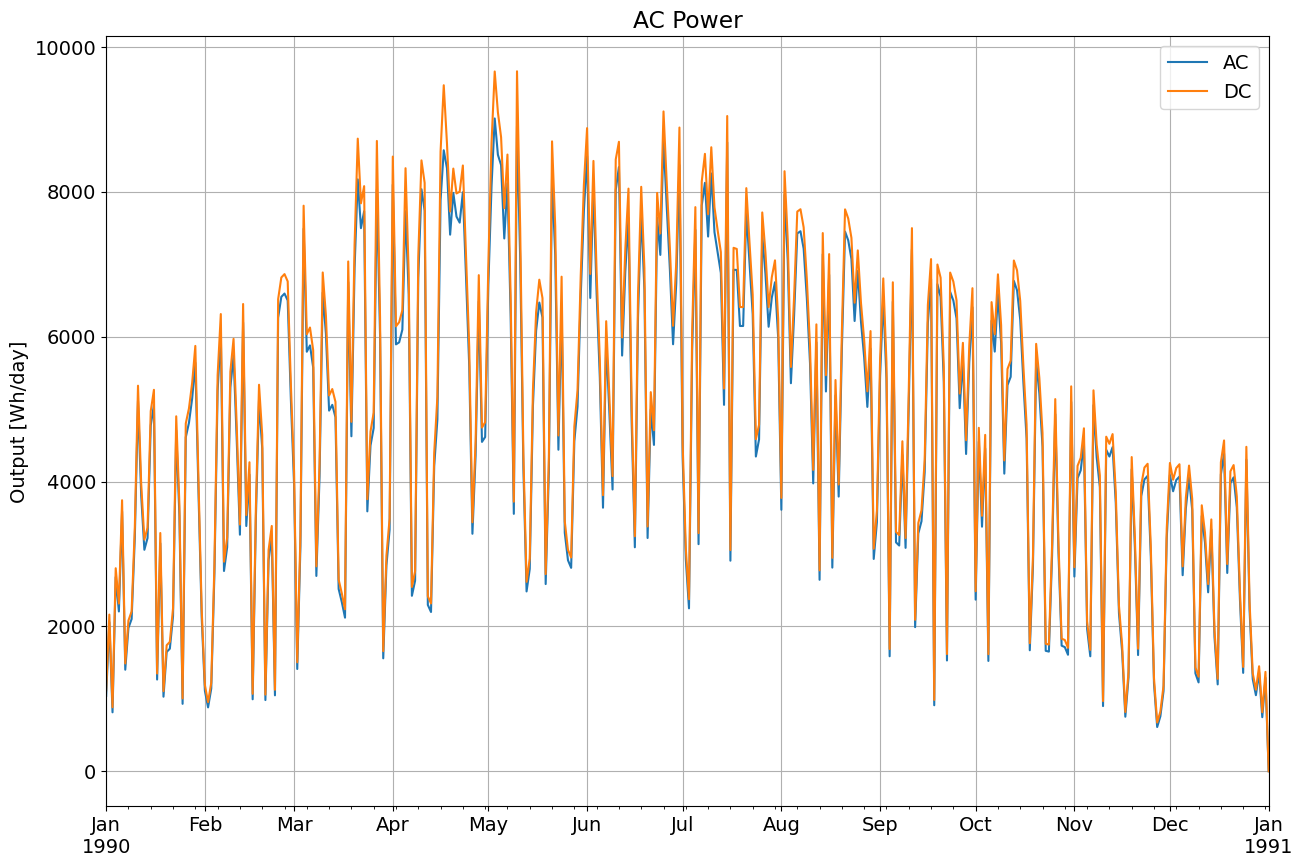

In [102]:
plt.rcParams['font.size'] = 14
ax = ac.resample('D').sum().plot(figsize=(15, 10), label='AC')
array_power.resample('D').sum().plot(ax=ax, label='DC')
plt.title('AC Power')
plt.ylabel('Output [Wh/day]')
plt.grid()
plt.legend()